In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = '../data/processed_dataset_new.csv'
subway_df = pd.read_csv(data,low_memory=False)
subway_df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,latitude,longitude,Georeference,ridership,weekend
0,2023-01-01 14:00:00,staten_island_railway,501,St George (SIR),Staten Island,40.643750,-74.073650,POINT (-74.07365 40.64375),109,1
1,2023-01-01 14:00:00,staten_island_railway,502,Tompkinsville (SIR),Staten Island,40.636948,-74.074840,POINT (-74.07484 40.636948),11,1
2,2023-01-01 14:00:00,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.912030,POINT (-73.91203 40.775036),321,1
3,2023-01-01 14:00:00,subway,10,"49 St (N,R,W)",Manhattan,40.759900,-73.984140,POINT (-73.98414 40.7599),604,1
4,2023-01-01 14:00:00,subway,100,"Hewes St (M,J)",Brooklyn,40.706870,-73.953430,POINT (-73.95343 40.70687),67,1
...,...,...,...,...,...,...,...,...,...,...
6962709,2024-10-27 23:00:00,subway,97,"Myrtle Av (M,J,Z)",Brooklyn,40.697210,-73.935650,POINT (-73.93565 40.69721),68,1
6962710,2024-10-27 23:00:00,subway,98,"Flushing Av (M,J)",Brooklyn,40.700260,-73.941124,POINT (-73.941124 40.70026),42,1
6962711,2024-10-27 23:00:00,subway,99,"Lorimer St (M,J)",Brooklyn,40.703870,-73.947410,POINT (-73.94741 40.70387),24,1
6962712,2024-10-27 23:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,40.761337,-73.964160,POINT (-73.96416 40.761337),52,1


In [21]:
subway_df.isna().sum()

transit_timestamp     0
transit_mode          0
station_complex_id    0
station_complex       0
borough               0
latitude              0
longitude             0
Georeference          0
ridership             0
weekend               0
dtype: int64

No missing value found

Weekday

In [22]:
subway_df['transit_timestamp'] = pd.to_datetime(subway_df['transit_timestamp'], format="%Y-%m-%d %H:%M:%S")

# Add the 'weekend' column if it doesn't exist (optional step)
if 'weekend' not in subway_df.columns:
    subway_df['weekend'] = subway_df['transit_timestamp'].dt.dayofweek.apply(lambda x: 1 if x in [5, 6] else 0)
weekday_df = subway_df[subway_df['weekend'] == 0]

In [23]:
weekday_df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,latitude,longitude,Georeference,ridership,weekend
4429,2023-01-02 00:00:00,staten_island_railway,501,St George (SIR),Staten Island,40.643750,-74.073650,POINT (-74.07365 40.64375),40,0
4430,2023-01-02 00:00:00,staten_island_railway,502,Tompkinsville (SIR),Staten Island,40.636948,-74.074840,POINT (-74.07484 40.636948),4,0
4431,2023-01-02 00:00:00,subway,1,"Astoria-Ditmars Blvd (N,W)",Queens,40.775036,-73.912030,POINT (-73.91203 40.775036),25,0
4432,2023-01-02 00:00:00,subway,10,"49 St (N,R,W)",Manhattan,40.759900,-73.984140,POINT (-73.98414 40.7599),303,0
4433,2023-01-02 00:00:00,subway,100,"Hewes St (M,J)",Brooklyn,40.706870,-73.953430,POINT (-73.95343 40.70687),12,0
...,...,...,...,...,...,...,...,...,...,...
6941803,2024-10-25 23:00:00,subway,97,"Myrtle Av (M,J,Z)",Brooklyn,40.697210,-73.935650,POINT (-73.93565 40.69721),179,0
6941804,2024-10-25 23:00:00,subway,98,"Flushing Av (M,J)",Brooklyn,40.700260,-73.941124,POINT (-73.941124 40.70026),77,0
6941805,2024-10-25 23:00:00,subway,99,"Lorimer St (M,J)",Brooklyn,40.703870,-73.947410,POINT (-73.94741 40.70387),63,0
6941806,2024-10-25 23:00:00,tram,TRAM1,RI Tramway (Manhattan),Manhattan,40.761337,-73.964160,POINT (-73.96416 40.761337),72,0


Ridership Distribution Analysis

In [24]:
ridership_by_mode = weekday_df.groupby('transit_mode')['ridership'].sum().reset_index()

In [25]:
ridership_by_mode

,transit_mode,ridership
0,staten_island_railway,3390102
1,subway,1721175051
2,tram,3775514


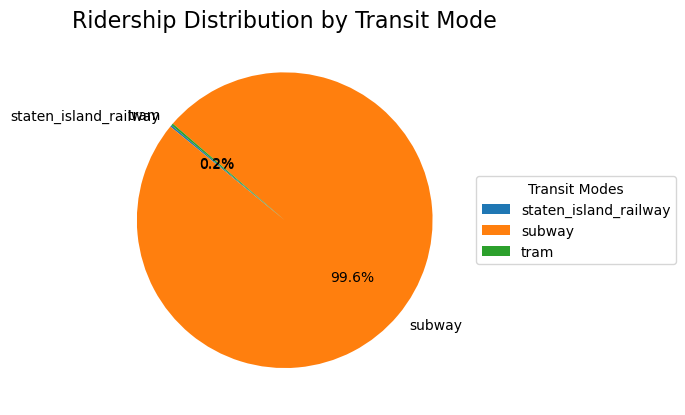

In [26]:
plt.pie(ridership_by_mode['ridership'], labels=ridership_by_mode['transit_mode'], autopct='%1.1f%%', startangle=140)
plt.title('Ridership Distribution by Transit Mode', fontsize=16)
plt.legend(
    ridership_by_mode['transit_mode'],
    title="Transit Modes",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
plt.show()

Compare the average and total ridership per borough

In [27]:
ridership_by_borough = (
    weekday_df.groupby('borough')['ridership']
    .agg(['sum', 'mean'])  # Calculate total (sum) and average (mean) ridership
    .reset_index()
    .rename(columns={'sum': 'total_ridership', 'mean': 'average_ridership'})
)

print(ridership_by_borough)

         borough  total_ridership  average_ridership
0          Bronx        123867733         159.681396
1       Brooklyn        385458729         212.825168
2      Manhattan        954153832         639.200547
3         Queens        261470268         287.274088
4  Staten Island          3390105         156.399013


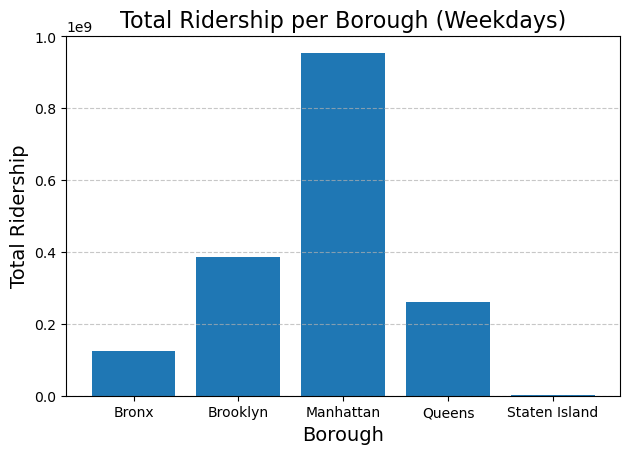

In [28]:
plt.bar(ridership_by_borough['borough'], ridership_by_borough['total_ridership'])
plt.title('Total Ridership per Borough (Weekdays)', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

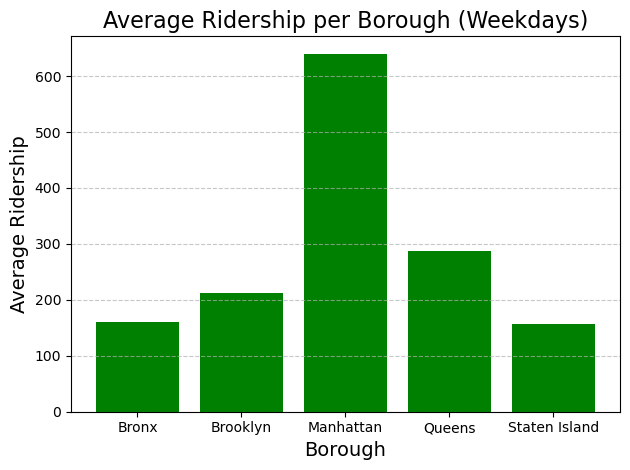

In [29]:
plt.bar(ridership_by_borough['borough'], ridership_by_borough['average_ridership'], color='green')
plt.title('Average Ridership per Borough (Weekdays)', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Average Ridership', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

         borough  population  total_ridership  ridership_per_capita
0      Manhattan     1645867        954153832            579.727178
1       Brooklyn     2679620        385458729            143.848280
2         Queens     2360826        261470268            110.753723
3  Staten Island      492925          3390105              6.877527
4          Bronx     1331144        123867733             93.053594


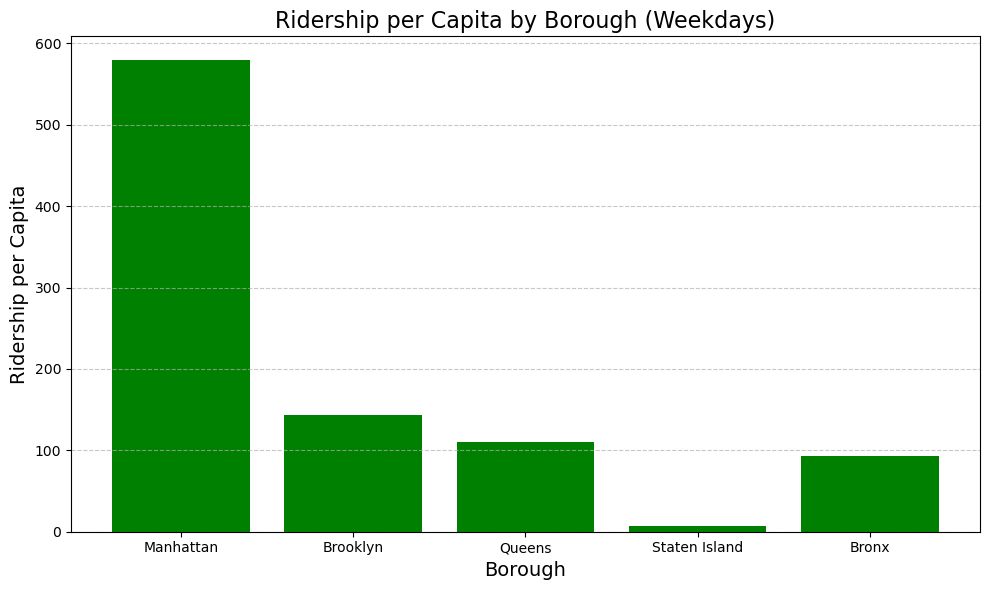

In [30]:
borough_data = {
    'Manhattan': {'population': 1645867},
    'Brooklyn': {'population': 2679620},
    'Queens': {'population': 2360826},
    'Staten Island': {'population': 492925},
    'Bronx': {'population': 1331144}
}

# Convert borough_data to a DataFrame
borough_stats = pd.DataFrame.from_dict(borough_data, orient='index').reset_index()
borough_stats.rename(columns={'index': 'borough'}, inplace=True)

# Group by borough to calculate total ridership
ridership_by_borough = (
    weekday_df.groupby('borough')['ridership']
    .sum()
    .reset_index()
    .rename(columns={'ridership': 'total_ridership'})
)

# Merge ridership data with borough stats
borough_stats = borough_stats.merge(ridership_by_borough, on='borough', how='left')

# Calculate ridership per capita and ridership density
borough_stats['ridership_per_capita'] = borough_stats['total_ridership'] / borough_stats['population']

# Display the updated stats
print(borough_stats)

# Plot ridership per capita by borough
plt.figure(figsize=(10, 6))
plt.bar(borough_stats['borough'], borough_stats['ridership_per_capita'], color='green')
plt.title('Ridership per Capita by Borough (Weekdays)', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Ridership per Capita', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Temporal Analysis

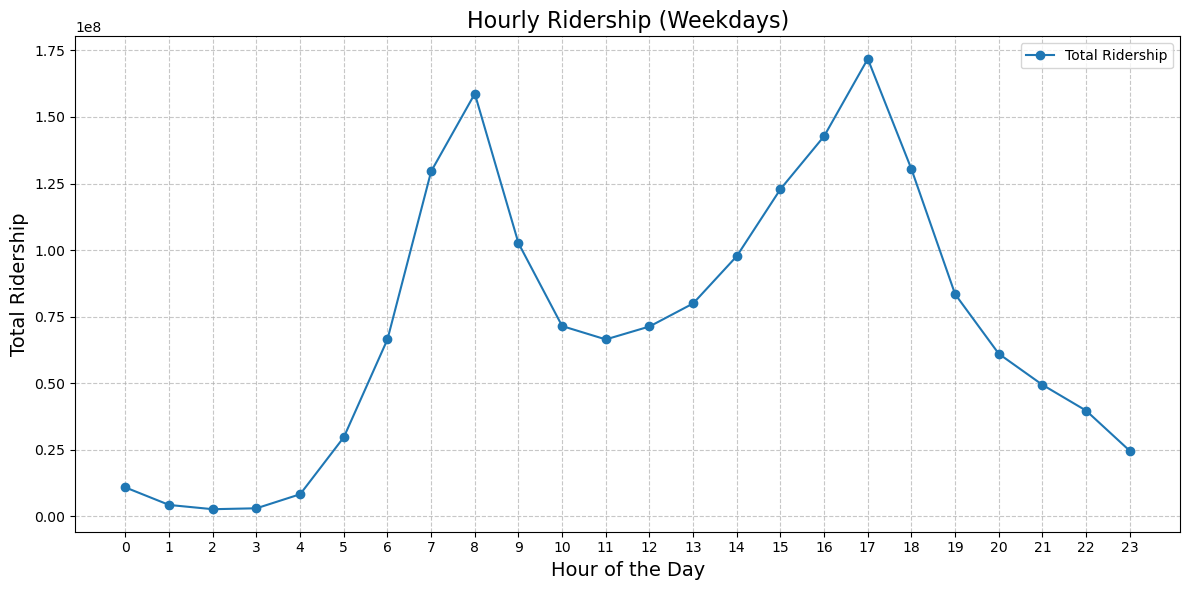

In [32]:
weekday_df.loc[:, 'hour'] = weekday_df['transit_timestamp'].dt.hour

hourly_ridership = weekday_df.groupby('hour')['ridership'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_ridership['hour'], hourly_ridership['ridership'], marker='o', label='Total Ridership')
plt.title('Hourly Ridership (Weekdays)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()

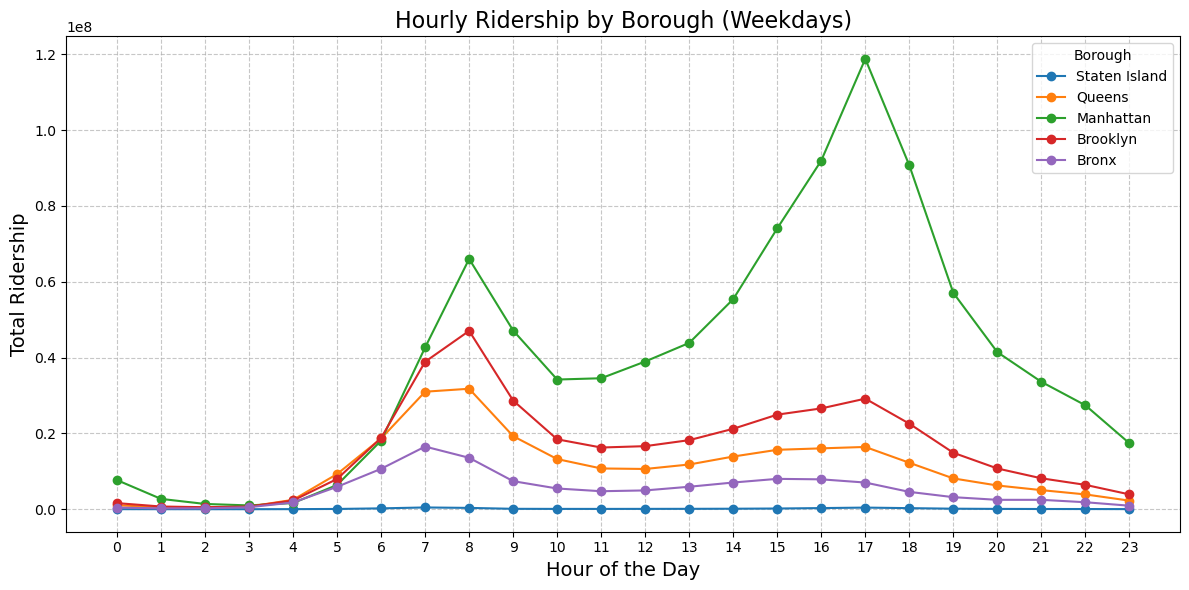

In [33]:
hourly_ridership_borough = weekday_df.groupby(['hour', 'borough'])['ridership'].sum().reset_index()

plt.figure(figsize=(12, 6))
for borough in weekday_df['borough'].unique():
    borough_data = hourly_ridership_borough[hourly_ridership_borough['borough'] == borough]
    plt.plot(borough_data['hour'], borough_data['ridership'], marker='o', label=borough)

plt.title('Hourly Ridership by Borough (Weekdays)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.legend(title='Borough')
plt.tight_layout()
plt.show()

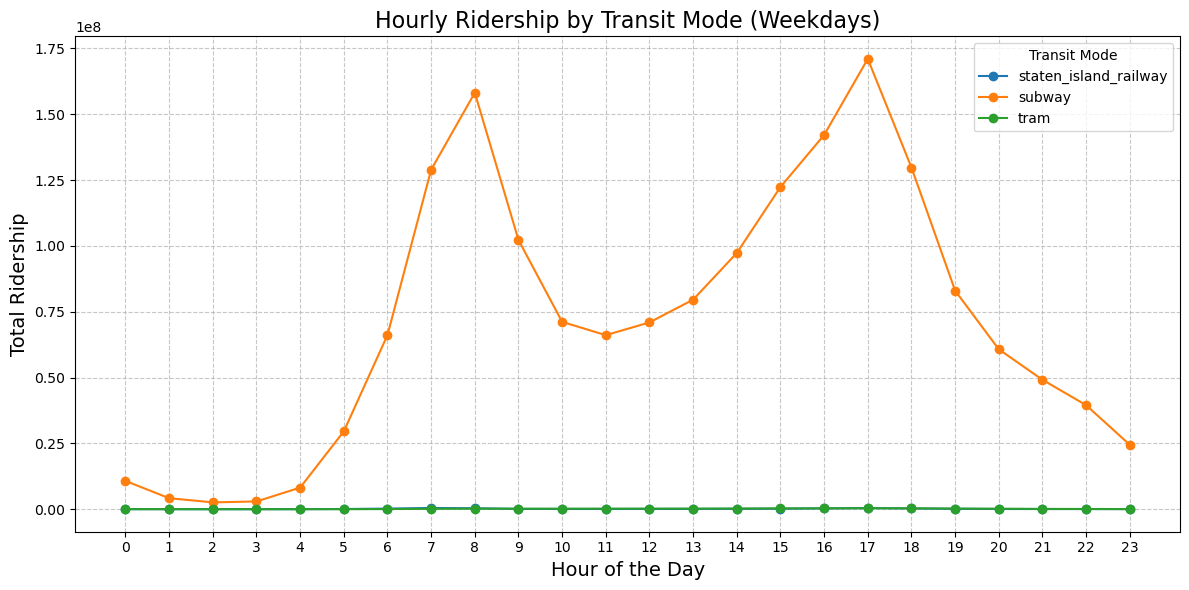

In [34]:
hourly_ridership_mode = weekday_df.groupby(['hour', 'transit_mode'])['ridership'].sum().reset_index()

plt.figure(figsize=(12, 6))
for mode in weekday_df['transit_mode'].unique():
    mode_data = hourly_ridership_mode[hourly_ridership_mode['transit_mode'] == mode]
    plt.plot(mode_data['hour'], mode_data['ridership'], marker='o', label=mode)

plt.title('Hourly Ridership by Transit Mode (Weekdays)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Ridership', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.legend(title='Transit Mode')
plt.tight_layout()
plt.show()